In [3]:
import imaging_behavior_functions
import odor_behavioral_analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize
import scipy.io
import os
import mat73
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.interpolate import interp1d
from scipy.stats import iqr
from PIL import Image
import cv2
from IPython.display import display, clear_output
import time
import seaborn as sns
from scipy.stats import iqr
from scipy.ndimage import gaussian_filter1d
import glob
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import plotly.graph_objects as go
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, SimpleRNN, Dense, TimeDistributed

c:\Users\wilson\anaconda3\envs\2p_process\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [4]:
base_path = "C:/Users/wilson/OneDrive - Harvard University/Thesis - Wilson lab/2P imaging/preprocessed data/qualified_sessions/multi_trial_sessions/with_odor/"
example_path_data = base_path+"20230529-3_MBON09_hDeltaB_syntGCAMP7f_odor/data/"
example_path_results = base_path+"20230529-3_MBON09_hDeltaB_syntGCAMP7f_odor/results/"
trial_num = 1
odor_threshold = 5
time_interval_threshold = 16  # Assuming time is in seconds or an equivalent unit
k = 8
window_size = 30

is_mat73, roi_df, dff_raw, kinematics_raw, preprocessed_vars_ds, preprocessed_vars_odor = imaging_behavior_functions.load_intermediate_mat(example_path_data,trial_num)
behav_df = imaging_behavior_functions.make_df_behavior(dff_raw, preprocessed_vars_ds, preprocessed_vars_odor,trial_num,ball_d = 9)
xPos, yPos = imaging_behavior_functions.reconstruct_path(behav_df, ball_d = 9)
roi_names, hdeltab_index, epg_index, hdeltab_sequence, epg_sequence = imaging_behavior_functions.get_roi_seq(roi_df)
dff_all_rois, dff_time = imaging_behavior_functions.load_dff_raw(is_mat73, dff_raw)
neural_df = imaging_behavior_functions.make_df_neural(dff_all_rois, dff_time, roi_names, hdeltab_index, epg_index, hdeltab_sequence, epg_sequence)
#behav_df, padded_result_df, smoothed_df = odor_behavioral_analysis.analysis_dfs(behav_df, time_interval_threshold, k, window_size)
combined_df = imaging_behavior_functions.combine_df(behav_df, neural_df)
#smoothed_df["translationalV_smoothed"] = np.sqrt(smoothed_df["fwV_smoothed"]**2+smoothed_df["sideV_smoothed"]**2)

In [5]:
selected_df = neural_df.filter(like='hDeltaB')
selected_df

,hDeltaB_0,hDeltaB_1,hDeltaB_2,hDeltaB_3,hDeltaB_4,hDeltaB_5,hDeltaB_6,hDeltaB_7,hDeltaB_8,hDeltaB_9,...,hDeltaB_11,hDeltaB_12,hDeltaB_13,hDeltaB_14,hDeltaB_15,hDeltaB_16,hDeltaB_17,hDeltaB_18,hDeltaB_19,hDeltaB_20
0,1.590838,0.735520,0.641548,0.692842,0.866954,0.763943,0.863997,0.916645,0.673691,1.525445,...,2.176712,1.462960,1.232131,1.032067,0.706348,0.425421,1.014452,0.676755,0.344793,0.111415
1,1.559020,0.922043,0.817839,0.736467,0.849124,0.823158,0.817577,0.979520,0.723363,1.625718,...,2.273949,1.694362,1.544201,1.144771,0.842663,0.653201,0.951931,0.920677,0.503818,0.318629
2,1.444763,1.022233,0.920657,0.766335,0.781021,0.746061,0.793546,0.983860,0.927996,1.797781,...,2.407882,1.883836,1.848538,1.314677,1.012601,0.898858,1.044521,1.109550,0.707051,0.480394
3,1.431276,1.057497,0.756452,0.731296,0.669075,0.545127,0.665388,0.834360,1.013022,2.035808,...,2.745381,2.212863,2.086307,1.496506,1.057245,1.082628,1.206423,1.225524,0.760744,0.538503
4,1.513375,1.050099,0.546538,0.557557,0.542239,0.392991,0.455136,0.658385,0.958424,2.202142,...,3.151800,2.557692,2.137304,1.798104,1.055213,1.158254,1.385705,1.364738,0.712912,0.532777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1742,1.869897,1.490332,1.345980,1.510160,1.321355,1.359485,0.621821,0.455027,0.387948,0.464127,...,0.780109,0.446613,0.734249,0.699040,0.484263,0.762138,1.153171,1.322167,1.405464,1.647470
1743,1.856835,1.689833,1.347858,1.460416,1.360768,1.411279,0.687017,0.583310,0.425251,0.426905,...,0.732679,0.344268,0.729412,0.639807,0.546390,0.670160,0.995137,1.502689,1.464547,1.834688
1744,1.791793,1.558499,1.275185,1.281542,1.256266,1.296330,0.596988,0.562734,0.487133,0.249100,...,0.463907,0.562606,0.701587,0.491743,0.635993,0.644363,1.039816,1.662676,1.435314,2.126265
1745,1.880841,1.374430,1.216998,1.153173,1.167017,1.269451,0.474110,0.466959,0.645554,0.140617,...,0.347312,0.809255,0.558380,0.260290,0.671195,0.668636,1.179824,1.633300,1.457536,2.203483


In [6]:
# mean MBON09
mean_MBON09 = np.array(neural_df.MBON09L + neural_df.MBON09R)
mean_MBON09

array([1.35784186, 1.56943847, 1.85284874, ..., 0.79372178, 0.70832508,
       0.59939807])

In [7]:
def perform_pca(selected_df, n_components=3):
    """
    Perform PCA on the given dataframe.

    Args:
    - data (pd.DataFrame): The dataframe containing neuron activity data.
    - n_components (int): The number of principal components to compute.

    Returns:
    - pca (PCA object): The PCA object after fitting the data.
    - transformed_data (np.array): Data transformed into principal components.
    - explained_variance_ratio (np.array): The amount of variance explained by each of the selected components.
    """
    # Standardize the data (important for PCA)
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(selected_df)

    # Perform PCA
    pca = PCA(n_components=n_components)
    transformed_data = pca.fit_transform(scaled_data)
    explained_variance_ratio = pca.explained_variance_ratio_

    return pca, transformed_data, explained_variance_ratio
pca, transformed_data, explained_variance_ratio = perform_pca(selected_df,n_components=3)

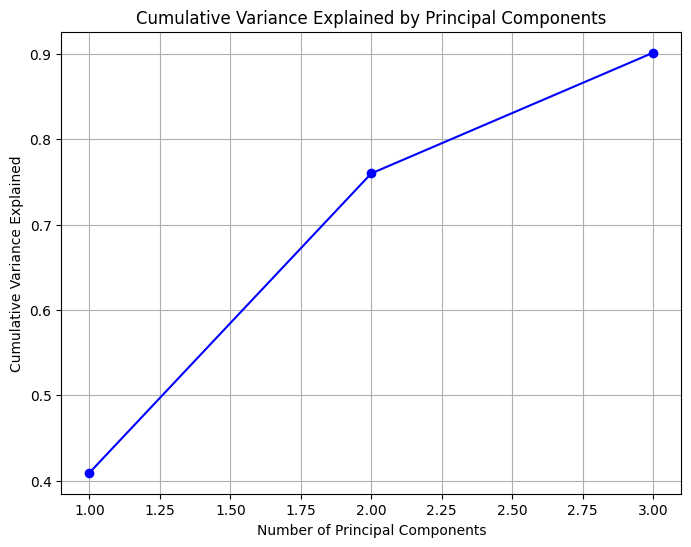

In [8]:
# Calculate cumulative variance explained
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
n_components = 3
# Plot cumulative variance explained
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, n_components + 1), cumulative_variance, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('Cumulative Variance Explained by Principal Components')
plt.grid(True)
plt.show()

In [9]:
roi_kw = 'hDeltaB'
roi_mtx = imaging_behavior_functions.extract_heatmap(neural_df, roi_kw, 1, example_path_results, trial_num)
param_df = imaging_behavior_functions.fit_sinusoid(neural_df,roi_mtx)
param_df

,time,phase,baseline,amplitude,phase_error,baseline_error,amplitude_error
0,0.000000,2.827433,0.201333,0.541886,0.321497,0.121208,0.168566
1,0.240513,2.827433,0.416882,0.448786,0.351794,0.109302,0.151199
2,0.481026,3.455752,0.617697,0.472955,0.300987,0.098905,0.137356
3,0.721539,3.769911,0.698740,0.754883,0.179406,0.095536,0.134785
4,0.962052,4.084070,0.721937,1.149012,0.137750,0.112476,0.159851
...,...,...,...,...,...,...,...
1742,418.973587,0.628319,0.432679,1.327284,0.114075,0.105814,0.147856
1743,419.214100,0.628319,0.481023,1.445989,0.096406,0.097546,0.136484
1744,419.454613,0.314159,0.407926,1.406939,0.096131,0.094277,0.131377
1745,419.695126,0.314159,0.321988,1.394511,0.107054,0.103838,0.144369


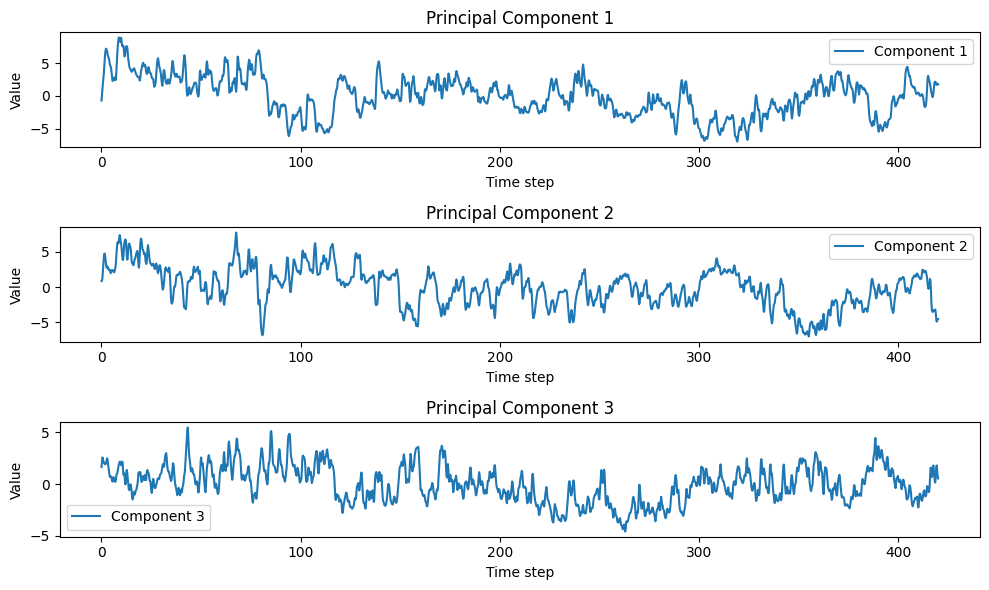

In [10]:
# visualze top PCstime_steps = range(transformed_data.shape[0])

n_components = 3
time_steps = range(transformed_data.shape[0])

# Create a figure with subplots
fig, axes = plt.subplots(n_components, 1, figsize=(10, 2*n_components))

for i in range(n_components):
    ax = axes[i]
    ax.plot(neural_df.time, transformed_data[:, i], label=f'Component {i+1}')
    ax.set_title(f'Principal Component {i+1}')
    ax.set_xlabel('Time step')
    ax.set_ylabel('Value')
    ax.legend()

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

In [174]:
# Concatenate your inputs to form a single feature vector per time frame
features = np.concatenate([transformed_data, np.array(behav_df[['yawV']]), mean_MBON09[:,np.newaxis]], axis=1)  # This will have shape (3554, 5)
# Create a scaler instance
scaler = StandardScaler()

# Fit the scaler to your features and transform them
features_scaled = scaler.fit_transform(features)

seq_length = 5  # Example sequence length
num_samples = features.shape[0] - seq_length

# Initialize X_train and y_train
X_train = np.zeros((num_samples, seq_length, features_scaled.shape[1]))  # Input sequences
y_train = np.zeros((num_samples, transformed_data.shape[1]))  # Target outputs (next time frame's x)

# Build the sequences
for i in range(num_samples):
    X_train[i] = features_scaled[i:i+seq_length]
    y_train[i] = transformed_data[i+seq_length]

# X_train is now formatted and ready for training, with shape (num_samples, seq_length, 5)
# y_train is the target state vectors, with shape (num_samples, 3)


In [175]:
num_features = features.shape[1]
num_target_features = transformed_data.shape[1]
hidden_units = 4
'''model = Sequential([
    SimpleRNN(8, activation='relu', input_shape=(None, num_features), ),  # Adjust 'None' for sequence length if fixed, and 'num_features' accordingly
    Dense(num_target_features, activation='linear')  # Output layer
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=64)
'''
inputs = Input(shape=(seq_length, num_features))
rnn_out = SimpleRNN(hidden_units, activation='relu', return_sequences=True)(inputs)  # Keep return_sequences=True for analysis
# Extract the last timestep output for prediction purposes
last_timestep_output = rnn_out[:, -1, :]
predictions = Dense(num_target_features, activation='linear')(last_timestep_output)

# Full model for training
model = Model(inputs=inputs, outputs=predictions)
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
history = model.fit(X_train, y_train, epochs=150, validation_split=0.2, batch_size=64)


Epoch 1/150
22/22 [==============================] - 1s 15ms/step - loss: 6.7900 - val_loss: 5.7650
Epoch 2/150
22/22 [==============================] - 0s 3ms/step - loss: 6.4318 - val_loss: 5.5256
Epoch 3/150
22/22 [==============================] - 0s 3ms/step - loss: 6.1590 - val_loss: 5.3471
Epoch 4/150
22/22 [==============================] - 0s 3ms/step - loss: 5.9261 - val_loss: 5.1864
Epoch 5/150
22/22 [==============================] - 0s 3ms/step - loss: 5.7150 - val_loss: 5.0322
Epoch 6/150
22/22 [==============================] - 0s 3ms/step - loss: 5.5133 - val_loss: 4.8805
Epoch 7/150
22/22 [==============================] - 0s 3ms/step - loss: 5.3239 - val_loss: 4.7249
Epoch 8/150
22/22 [==============================] - 0s 6ms/step - loss: 5.1329 - val_loss: 4.5677
Epoch 9/150
22/22 [==============================] - 0s 3ms/step - loss: 4.9530 - val_loss: 4.3928
Epoch 10/150
22/22 [==============================] - 0s 3ms/step - loss: 4.7659 - val_loss: 4.2084
Epoch 11

In [176]:
model.summary()

Model: "model_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 5, 5)]            0         
                                                                 
 simple_rnn_15 (SimpleRNN)   (None, 5, 4)              40        
                                                                 
 tf.__operators__.getitem_1  (None, 4)                 0         
 5 (SlicingOpLambda)                                             
                                                                 
 dense_15 (Dense)            (None, 3)                 15        
                                                                 
Total params: 55 (220.00 Byte)
Trainable params: 55 (220.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


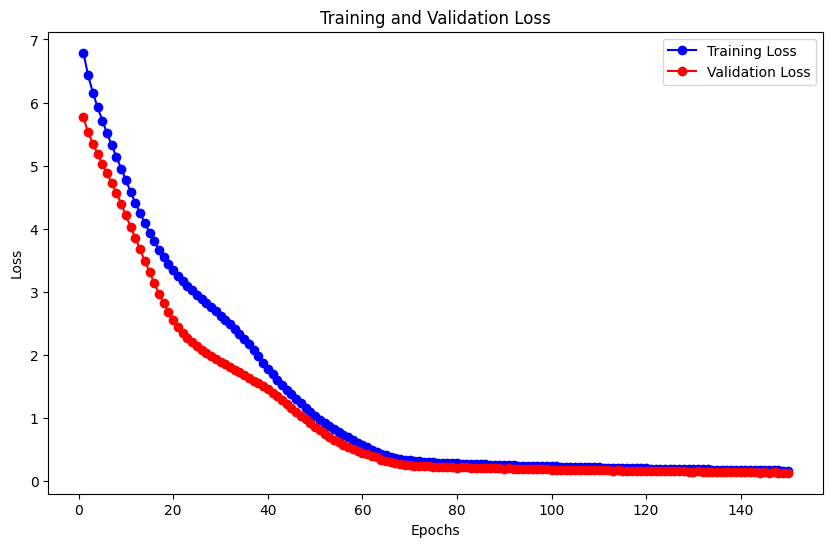

In [177]:

# Assuming 'history' is the object returned by the model.fit call
# It contains training and validation loss values among other things

# Extract the loss and validation loss
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)  # Number of epochs

# Create a line plot for the loss
plt.figure(figsize=(10, 6))  # Optional: Adjusts the size of the figure
plt.plot(epochs, loss, 'bo-', label='Training Loss')  # 'bo-' gives blue color, circle markers, and solid line
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')  # 'ro-' gives red color, circle markers, and solid line
plt.title('Training and Validation Loss')  # Title of the plot
plt.xlabel('Epochs')  # X-axis label
plt.ylabel('Loss')  # Y-axis label
plt.legend()  # Adds a legend to specify which line is which

plt.show()  # Displays the plot


55/55 [==============================] - 0s 1ms/step


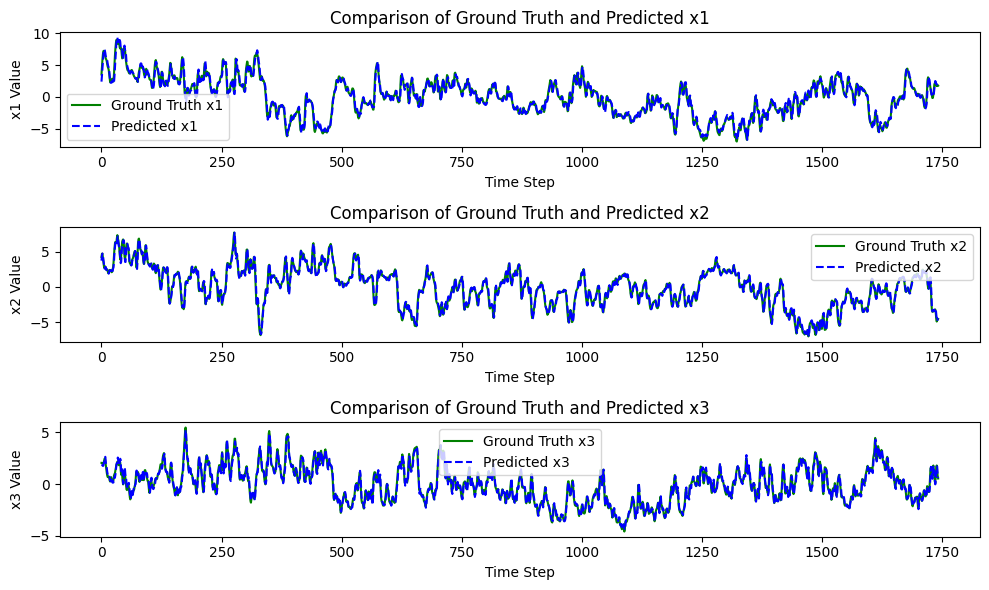

In [178]:
y_train_pred = model.predict(X_train)
# Create a figure and a set of subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 6))

# Plotting the first dimension
axs[0].plot(y_train[:,0], 'g-', label='Ground Truth x1')  # Green solid line
axs[0].plot(y_train_pred[:,0], 'b--', label='Predicted x1')  # Blue dashed line
axs[0].set_title('Comparison of Ground Truth and Predicted x1')
axs[0].set_xlabel('Time Step')
axs[0].set_ylabel('x1 Value')
axs[0].legend()

# Plotting the second dimension
axs[1].plot(y_train[:,1], 'g-', label='Ground Truth x2')  # Green solid line
axs[1].plot(y_train_pred[:,1], 'b--', label='Predicted x2')  # Blue dashed line
axs[1].set_title('Comparison of Ground Truth and Predicted x2')
axs[1].set_xlabel('Time Step')
axs[1].set_ylabel('x2 Value')
axs[1].legend()

# Plotting the third dimension
axs[2].plot(y_train[:,2], 'g-', label='Ground Truth x3')  # Green solid line
axs[2].plot(y_train_pred[:,2], 'b--', label='Predicted x3')  # Blue dashed line
axs[2].set_title('Comparison of Ground Truth and Predicted x3')
axs[2].set_xlabel('Time Step')
axs[2].set_ylabel('x3 Value')
axs[2].legend()

plt.tight_layout()  # Adjust the layout to make room for the titles and labels
plt.show()


## recurrent weights visualization

In [180]:
def get_rnn_layer(model, substring="rnn"):
    """
    Fetch the first layer that contains a specified substring in its name.

    Parameters:
    - model: The model from which to fetch the layer.
    - substring: The substring to look for in the layer names.

    Returns:
    - The first layer that contains the specified substring in its name, or None if no such layer is found.
    """
    for layer in model.layers:
        if substring in layer.name:
            return layer
    return None



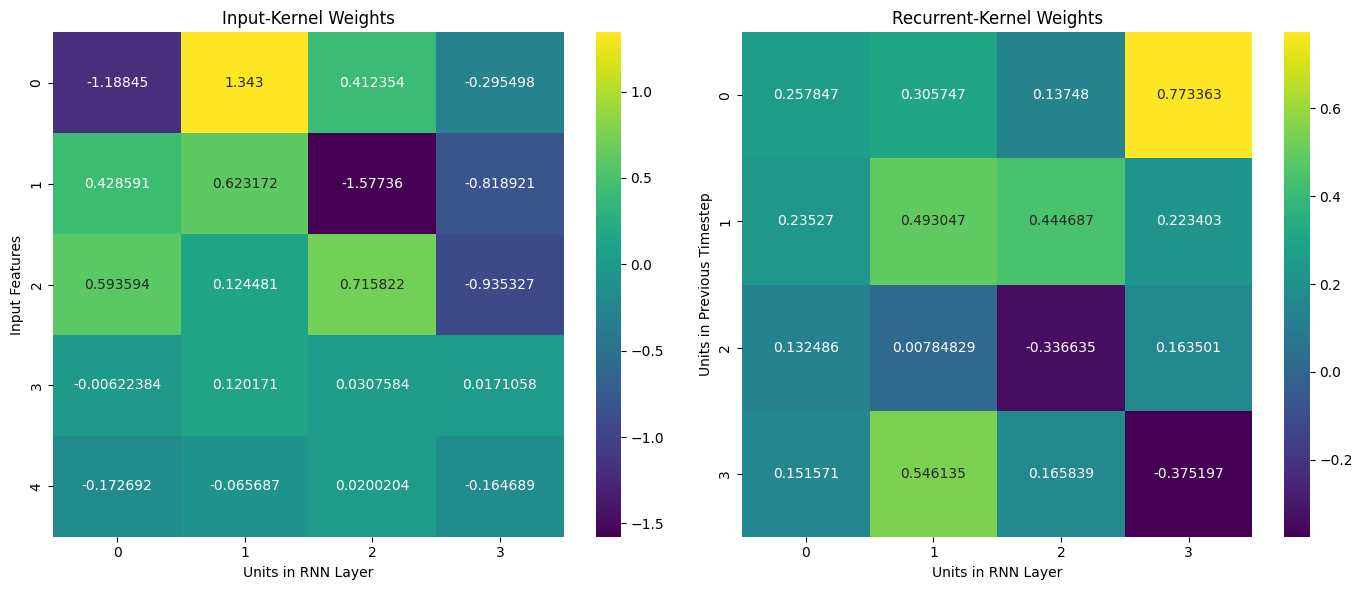

In [181]:
# Extract weights
rnn_layer = get_rnn_layer(model,'rnn')
weights = rnn_layer.get_weights()

# weights[0] are the weights for the input (kernel)
# weights[1] are the recurrent weights (recurrent_kernel)
# weights[2] are the biases (not visualized here but can be, similar to weights)

# Set up the matplotlib figure
plt.figure(figsize=(14, 6))

# Plot input-kernel weights
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.heatmap(weights[0], annot=True, cmap='viridis', fmt='g')
plt.title('Input-Kernel Weights')
plt.xlabel('Units in RNN Layer')
plt.ylabel('Input Features')

# Plot recurrent-kernel weights
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.heatmap(weights[1], annot=True, cmap='viridis', fmt='g')
plt.title('Recurrent-Kernel Weights')
plt.xlabel('Units in RNN Layer')
plt.ylabel('Units in Previous Timestep')

plt.tight_layout()
plt.show()


## output weights visualization

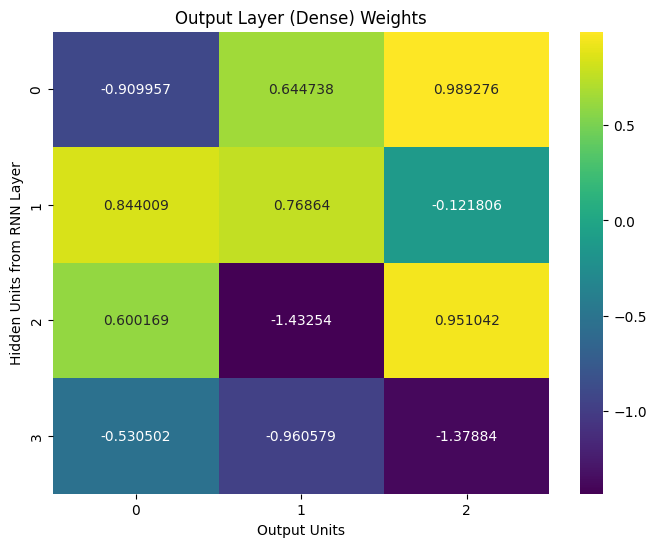

In [182]:
# Extract weights from the Dense layer
dense_layer = get_rnn_layer(model,'dense')
dense_weights = dense_layer.get_weights()

# dense_weights[0] are the weights of the dense layer (connecting RNN to output)
# dense_weights[1] are the biases of the dense layer

# Visualize the Dense layer weights
plt.figure(figsize=(8, 6))
sns.heatmap(dense_weights[0], annot=True, cmap='viridis', fmt='g')
plt.title('Output Layer (Dense) Weights')
plt.xlabel('Output Units')
plt.ylabel('Hidden Units from RNN Layer')
plt.show()


## Gradient heatmap

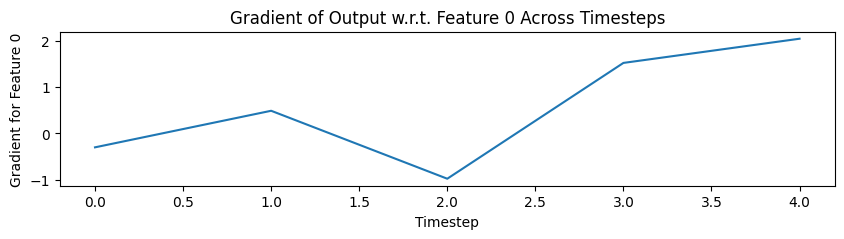

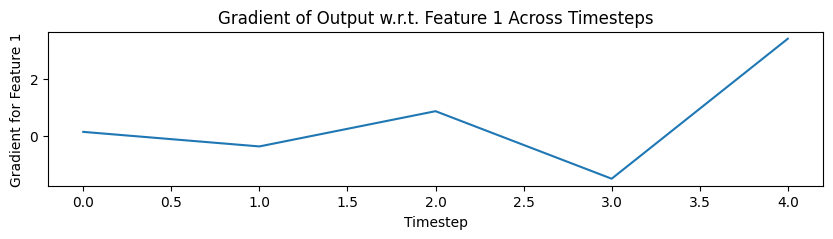

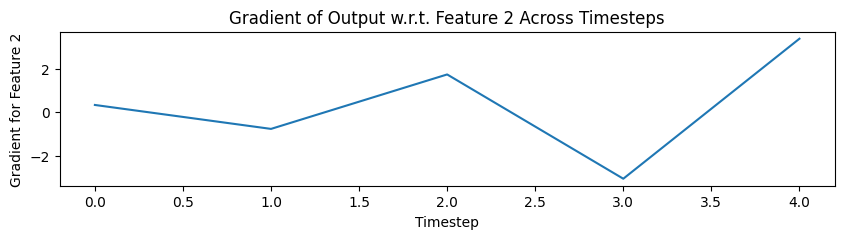

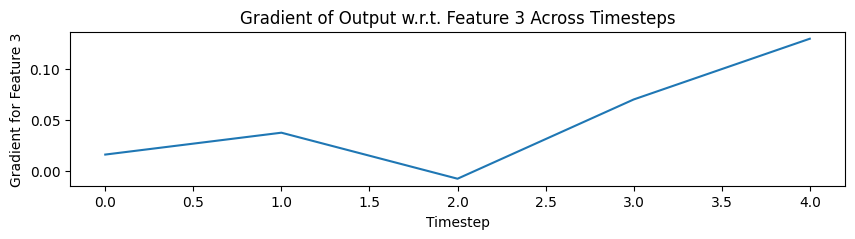

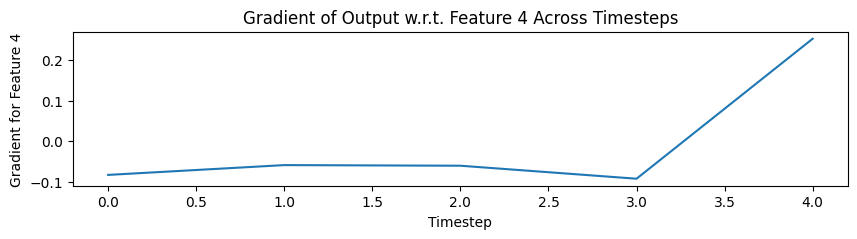

In [183]:
def compute_and_plot_gradients(model, X, input_sample_index, feature_index):
    """
    Compute and plot the gradients of the model's output with respect to an input sample for a specific feature.
    
    Parameters:
    - model: The trained RNN model.
    - X_test: The test dataset as a TensorFlow tensor or a numpy array.
    - input_sample_index: The index of the sample in X_test to analyze.
    - feature_index: The index of the feature for which to plot the gradients.
    """
    # Ensure X_test is a TensorFlow tensor
    X_tensor = tf.convert_to_tensor(X, dtype=tf.float32)
    
    # Select the specified input sample
    input_sample_tensor = X_tensor[input_sample_index:input_sample_index+1]
    
    # Watch the input sample tensor to compute gradients
    with tf.GradientTape() as tape:
        tape.watch(input_sample_tensor)
        predictions = model(input_sample_tensor)
    
    # Compute the gradients of the output with respect to the input
    gradients = tape.gradient(predictions, input_sample_tensor)
    
    # Extract the gradients for the specified feature across all timesteps
    gradients_for_feature = gradients[0, :, feature_index]
    
    # Plot the gradients
    plt.figure(figsize=(10, 2))
    plt.plot(gradients_for_feature)
    plt.title(f'Gradient of Output w.r.t. Feature {feature_index} Across Timesteps')
    plt.xlabel('Timestep')
    plt.ylabel(f'Gradient for Feature {feature_index}')
    plt.show()

# Example usage:
input_sample_index = 0
#feature_index=0
for i in range(num_features):
    compute_and_plot_gradients(model, X_train, input_sample_index, i)



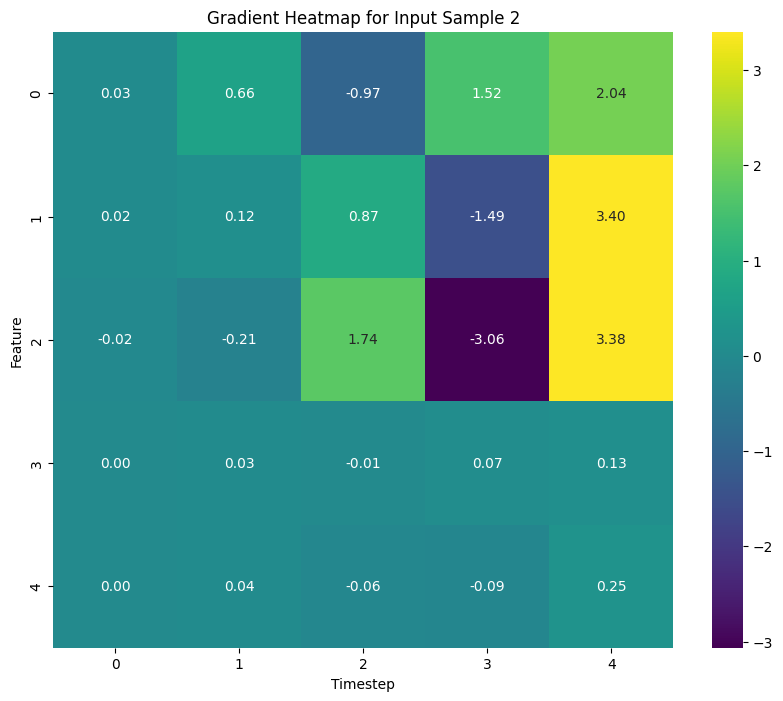

In [184]:
def plot_gradient_heatmap(model, X, input_sample_index):
    """
    Plot a heatmap of the gradients of the model's output with respect to all features across all timesteps 
    for a specified input sample.
    
    Parameters:
    - model: The trained RNN model.
    - X_test: The test dataset as a TensorFlow tensor or a numpy array.
    - input_sample_index: The index of the sample in X_test to analyze.
    """
    # Ensure X_test is a TensorFlow tensor
    X_tensor = tf.convert_to_tensor(X, dtype=tf.float32)
    
    # Select the specified input sample
    input_sample_tensor = X_tensor[input_sample_index:input_sample_index+1]
    
    # Watch the input sample tensor to compute gradients
    with tf.GradientTape() as tape:
        tape.watch(input_sample_tensor)
        predictions = model(input_sample_tensor)
    
    # Compute the gradients of the output with respect to the input
    gradients = tape.gradient(predictions, input_sample_tensor)
    
    # Extract the gradients for all features across all timesteps
    gradients_numpy = gradients.numpy()[0]  # Assuming the output is (1, timesteps, features)
    
    # Plot the heatmap
    plt.figure(figsize=(10, 8))
    ax = sns.heatmap(gradients_numpy.T, cmap='viridis', annot=True, fmt=".2f")
    ax.set_title(f'Gradient Heatmap for Input Sample {input_sample_index}')
    ax.set_xlabel('Timestep')
    ax.set_ylabel('Feature')
    plt.show()

# Example usage:
input_sample_index = 2
plot_gradient_heatmap(model, X_train, input_sample_index)


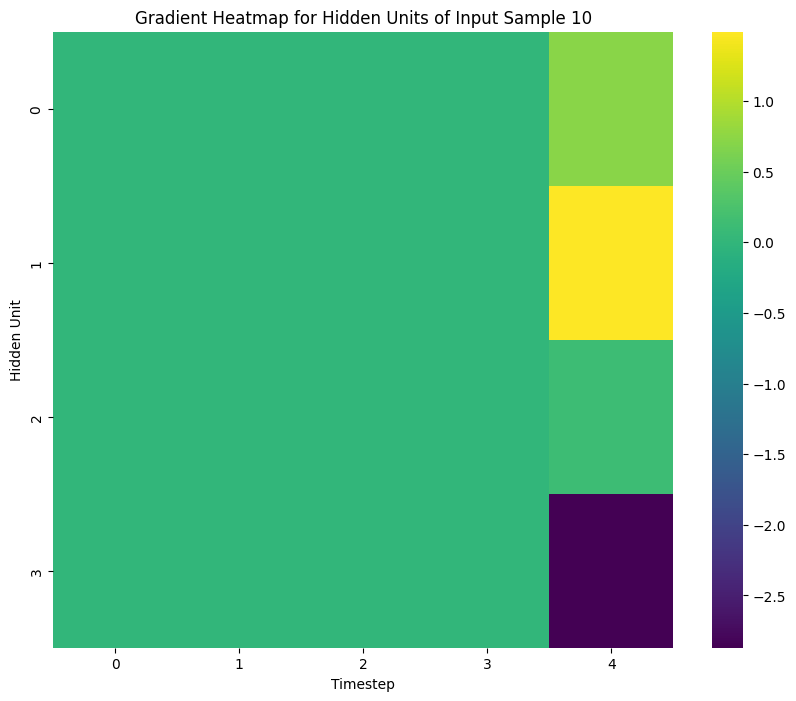

In [185]:

# Assuming 'model' is your original trained model
# Modify the model to also output the RNN layer's activations
rnn_layer_output = model.layers[1].output  # Assuming the RNN layer is at index 1
modified_model = Model(inputs=model.input, outputs=[model.output, rnn_layer_output])

# Select an input sample
input_sample_index = 10
input_sample_tensor = tf.convert_to_tensor(X_train[input_sample_index:input_sample_index+1], dtype=tf.float32)

# Use GradientTape to watch the intermediate activations
with tf.GradientTape() as tape:
    # predictions_and_activations will hold both the final predictions and the RNN layer's activations
    predictions_and_activations = modified_model(input_sample_tensor)
    predictions = predictions_and_activations[0]
    activations = predictions_and_activations[1]

# Now, compute gradients of the predictions with respect to the activations
gradients = tape.gradient(predictions, activations)

# Since we're interested in visualizing these gradients, continue as before
gradients_numpy = gradients.numpy().squeeze().T  # (units, timesteps)

# Plotting the heatmap
plt.figure(figsize=(10, 8))
ax = sns.heatmap(gradients_numpy, cmap='viridis', annot=False)
ax.set_title(f'Gradient Heatmap for Hidden Units of Input Sample {input_sample_index}')
ax.set_xlabel('Timestep')
ax.set_ylabel('Hidden Unit')
plt.show()


## tensorboard visualization

In [71]:
# TODO: figure ouot tensorboard 
log_dir = 'logs/model_graph'

# Ensure compatibility with newer TensorFlow versions for TensorBoard
tf.summary.create_file_writer(log_dir)

sample_input = tf.constant(X_train[0:1], dtype=tf.float32)

# Start recording the computation graph without profiler to avoid deprecation warnings
tf.summary.trace_on(graph=True)

_ = model(sample_input)

# Save the recorded graph to the log directory
with tf.summary.create_file_writer(log_dir).as_default():
    tf.summary.trace_export(name="model_graph", step=0)


## activations

In [187]:
layer_outputs = [layer.output for layer in model.layers if 'simple_rnn' in layer.name]  # Get the SimpleRNN layer output
activation_model = Model(inputs=model.input, outputs=layer_outputs)

1/1 [==============================] - 0s 228ms/step


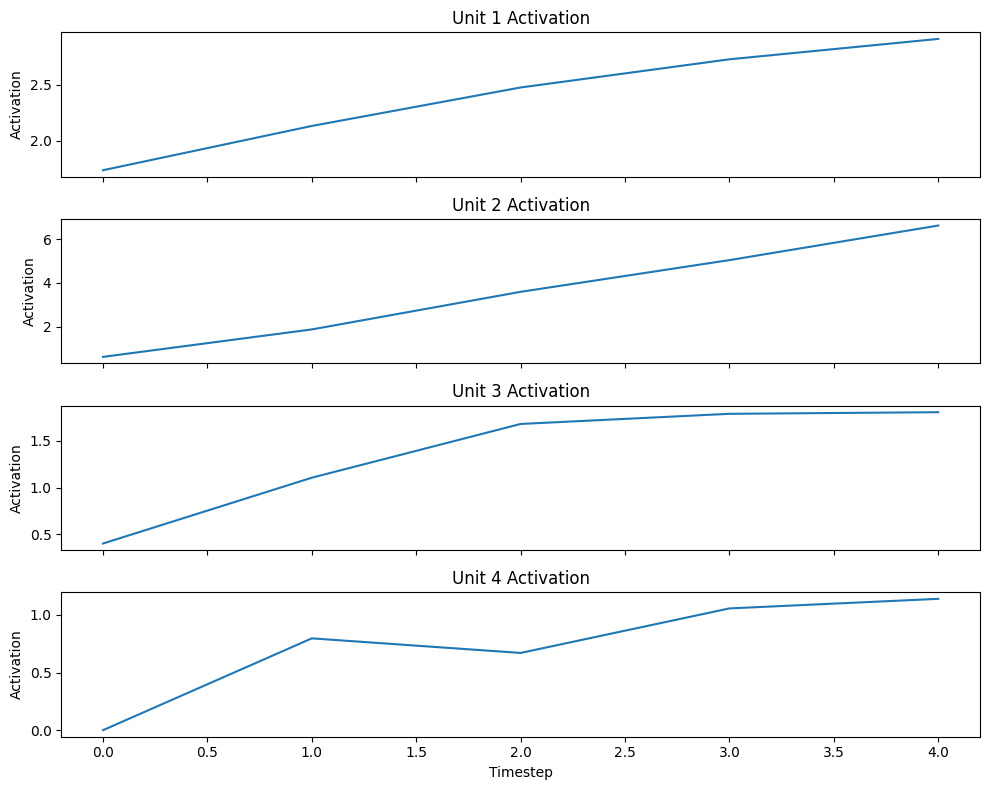

In [188]:
# Assuming you have an input sample you want to analyze
input_sample = X_train[0:1]  # For example, take the first sample from the test set

# Get the activations
activations = activation_model.predict(input_sample)
# Adjust 'activations[0]' if you have multiple layers you're extracting activations from
rnn_activations = activations[0]  # Shape: (1, timesteps, units)

# Remove the batch dimension
rnn_activations = rnn_activations.squeeze()  # Now shape is (timesteps, units)

# Plotting
n_units = rnn_activations.shape[1]
fig, axs = plt.subplots(n_units, 1, figsize=(10, n_units * 2), sharex=True)

if n_units == 1:
    axs = [axs]  # Ensure axs is iterable

for i, ax in enumerate(axs):
    ax.plot(rnn_activations[:, i])
    ax.set_title(f'Unit {i+1} Activation')
    ax.set_ylabel('Activation')
axs[-1].set_xlabel('Timestep')

plt.tight_layout()
plt.show()

1/1 [==============================] - 0s 20ms/step


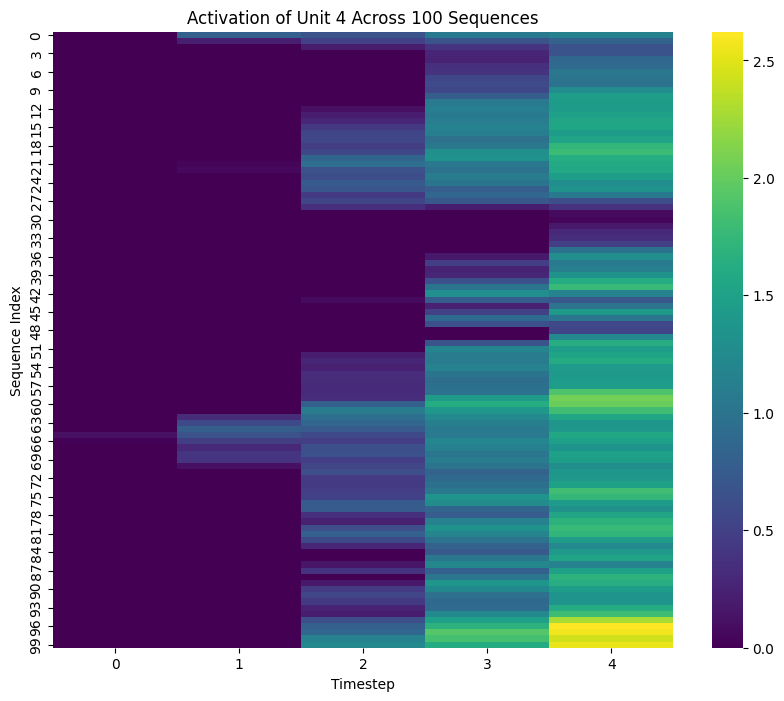

In [189]:
unit_index = 3  # Index of the unit you're interested in
num_samples = 100  # Number of samples you want to analyze, adjust as needed

# Initialize an array to store the activations
unit_activations = np.zeros((num_samples, seq_length))  # Assuming fixed seq_length for simplicity

# Collect activations
for i in range(num_samples):
    input_sample = X_train[i:i+1]  # Selecting individual samples
    activations = activation_model.predict(input_sample)
    rnn_activations = activations[0].squeeze()  # Shape: (timesteps, units)
    unit_activations[i] = rnn_activations[:, unit_index]


plt.figure(figsize=(10, 8))
sns.heatmap(unit_activations, cmap='viridis')
plt.title(f'Activation of Unit {unit_index+1} Across {num_samples} Sequences')
plt.xlabel('Timestep')
plt.ylabel('Sequence Index')
plt.show()


In [192]:
rnn_out

<KerasTensor: shape=(None, 5, 4) dtype=float32 (created by layer 'simple_rnn_15')>

In [190]:

# Assuming `features` is your entire dataset of shape (3554, num_features)
seq_length = 5  # The length of your input sequences
hidden_units = 4  # Assuming there are 4 hidden units in the RNN
model_with_activations = Model(inputs=inputs, outputs=[predictions, rnn_out])
# Initialize an array to store the activations
# For each of the 3554 timesteps, we want to store the activation of the last timestep
# in the sequence processed by the model, which reflects the most up-to-date state
all_activations = np.zeros((features.shape[0], hidden_units))

for i in range(seq_length, features.shape[0]):
    # Prepare the input sequence
    input_seq = features[i-seq_length:i].reshape(1, seq_length, -1)
    
    # Get the activations from your model
    # Modify this line according to how your model_with_activations is set up
    _, activations = model_with_activations.predict(input_seq)
    
    # Store the activations from the last timestep of the sequence
    all_activations[i] = activations[0, -1, :]  # Shape: (hidden_units,)

# Note: The first few timesteps (less than seq_length) won't have activations in this setup
# because they don't form a complete sequence on their own.
# You might choose to handle this by padding or similar strategies depending on your needs.


ValueError: Output tensors of a Functional model must be the output of a TensorFlow `Layer` (thus holding past layer metadata). Found: [[6.116419 2.434788 1.763618]]

In [165]:
np.shape(all_activations)

(1747, 4)

In [170]:
def plot_pairwise_state_space_trajectories(activations, title='State Space Trajectory'):
    """
    Plots pairwise state space trajectories of hidden unit activations.

    Parameters:
    - activations: A numpy array of shape (time_steps, hidden_units) containing the activations of the hidden units.
    - title: A title for the plots.
    """
    num_units = activations.shape[1]
    fig, axs = plt.subplots(nrows=num_units-1, ncols=num_units-1, figsize=(12, 12))
    fig.suptitle(title)
    
    for i in range(num_units):
        for j in range(i+1, num_units):
            ax = axs[j-1, i]
            ax.plot(activations[:, i], activations[:, j], marker='o', markersize=2, linestyle='-')
            ax.set_xlabel(f'Unit {i+1} Activation')
            ax.set_ylabel(f'Unit {j+1} Activation')
            ax.grid(True)
    
    # Hide empty subplots
    for i in range(num_units - 1):
        for j in range(i+1, num_units - 1):
            axs[i, j].set_visible(False)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])


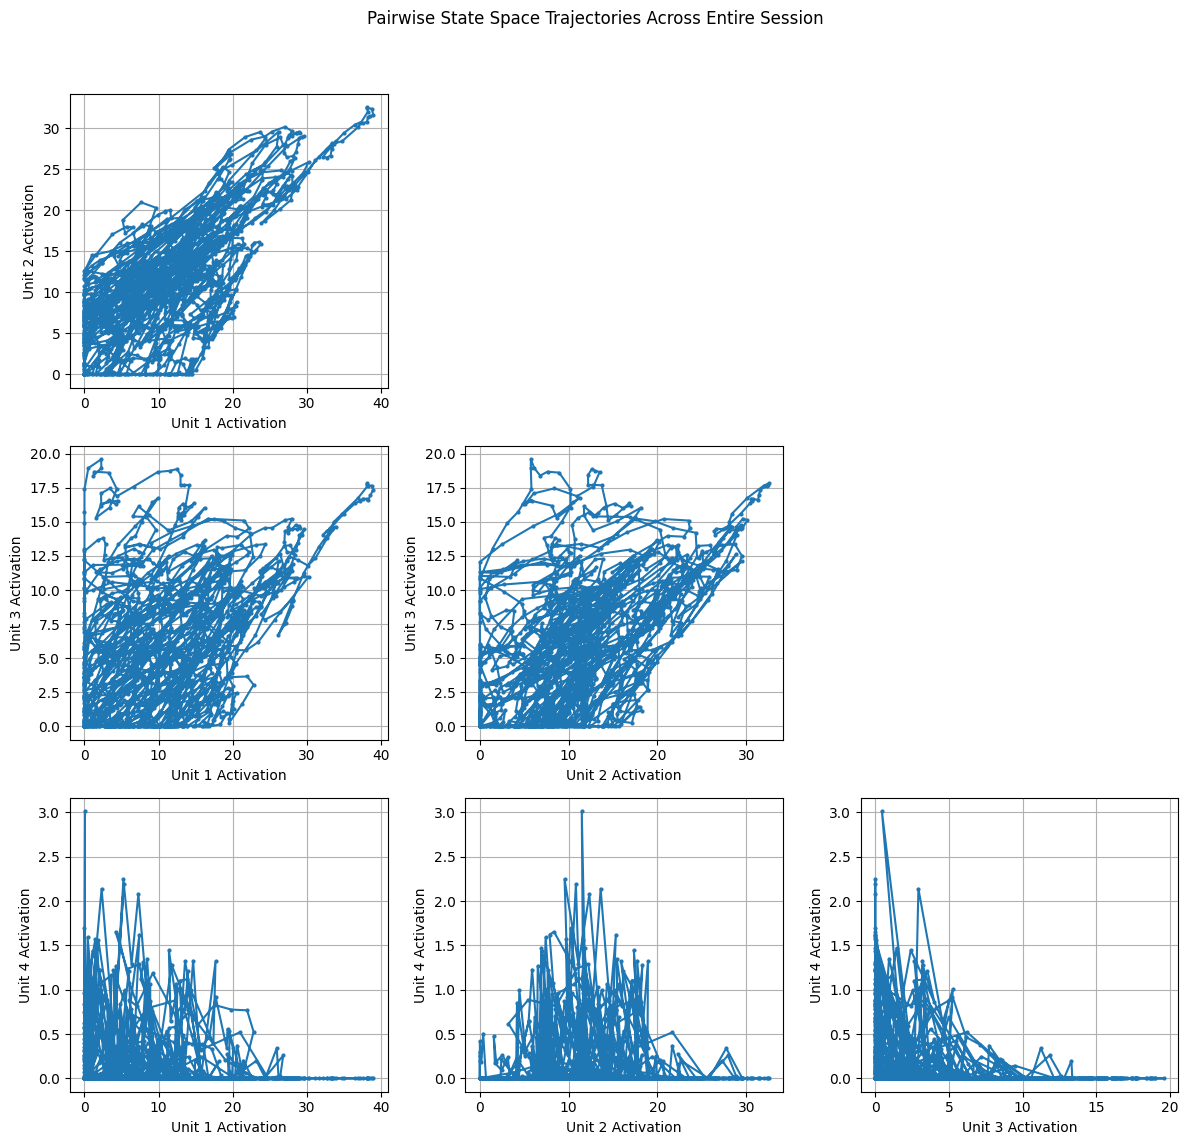

In [171]:
plot_pairwise_state_space_trajectories(all_activations, title='Pairwise State Space Trajectories Across Entire Session')

In [34]:
# Extract the first three PCs
pc1 = transformed_data[:, 0]
pc2 = transformed_data[:, 1]
pc3 = transformed_data[:, 2]

# Time steps for coloring
phase = np.array(param_df.phase)

# Create the figure
fig = go.Figure(data=[go.Scatter3d(
    x=pc1,
    y=pc2,
    z=pc3,
    mode='markers',
    marker=dict(
        size=5,
        color=phase,  # Set color to time steps
        colorscale='Viridis',  # Choose a color scale
        colorbar=dict(title='Phase'),
        opacity=0.8
    )
)])

# Set the layout of the figure
fig.update_layout(
    title='Trajectory of the First 3 Principal Components in State Space',
    scene=dict(
        xaxis_title='PC1',
        yaxis_title='PC2',
        zaxis_title='PC3'
    ),
    margin=dict(l=0, r=0, b=0, t=30)
)

# Show the figure
fig.show()


In [35]:
# Extract the first three PCs
pc1 = transformed_data[:, 0]
pc2 = transformed_data[:, 1]
pc3 = transformed_data[:, 2]

# Time steps for coloring
amplitude = np.array(param_df.amplitude)

# Create the figure
fig = go.Figure(data=[go.Scatter3d(
    x=pc1,
    y=pc2,
    z=pc3,
    mode='markers',
    marker=dict(
        size=5,
        color=amplitude,  # Set color to time steps
        colorscale='Viridis',  # Choose a color scale
        colorbar=dict(title='Amplitude'),
        opacity=0.8
    )
)])

# Set the layout of the figure
fig.update_layout(
    title='Trajectory of the First 3 Principal Components in State Space',
    scene=dict(
        xaxis_title='PC1',
        yaxis_title='PC2',
        zaxis_title='PC3'
    ),
    margin=dict(l=0, r=0, b=0, t=30)
)

# Show the figure
fig.show()


In [36]:
# Extract the first three PCs
pc1 = transformed_data[:, 0]
pc2 = transformed_data[:, 1]
pc3 = transformed_data[:, 2]

# Time steps for coloring
baseline = np.array(param_df.baseline)

# Create the figure
fig = go.Figure(data=[go.Scatter3d(
    x=pc1,
    y=pc2,
    z=pc3,
    mode='markers',
    marker=dict(
        size=4,
        color=baseline,  # Set color to time steps
        colorscale='Viridis',  # Choose a color scale
        colorbar=dict(title='Baseline'),
        opacity=0.5
    )
)])

'''for idx in big_drop_indices:
    fig.add_trace(go.Scatter3d(x=pc1[idx:idx+2], y=pc2[idx:idx+2], z=pc3[idx:idx+2],
                               mode='lines',
                               line=dict(color='red', width=2)))

for idx in big_increase_indices:
    fig.add_trace(go.Scatter3d(x=pc1[idx:idx+2], y=pc2[idx:idx+2], z=pc3[idx:idx+2],
                               mode='lines',
                               line=dict(color='black', width=2)))'''    
# Set the layout of the figure
fig.update_layout(
    title='Trajectory of the First 3 Principal Components in State Space',
    scene=dict(
        xaxis_title='PC1',
        yaxis_title='PC2',
        zaxis_title='PC3'
    ),
    margin=dict(l=0, r=0, b=0, t=30)
)

# Show the figure
fig.show()


In [78]:
# Extract the first three PCs
pc1 = transformed_data[:, 0]
pc2 = transformed_data[:, 1]
pc3 = transformed_data[:, 2]

# Time steps for coloring
#MBON09 = np.array(param_df.baseline)

# Create the figure
fig = go.Figure(data=[go.Scatter3d(
    x=pc1,
    y=pc2,
    z=pc3,
    mode='markers',
    marker=dict(
        size=4,
        color=mean_MBON09,  # Set color to time steps
        colorscale='Viridis',  # Choose a color scale
        colorbar=dict(title='MBON09'),
        opacity=0.5
    )
)])

'''for idx in big_drop_indices:
    fig.add_trace(go.Scatter3d(x=pc1[idx:idx+2], y=pc2[idx:idx+2], z=pc3[idx:idx+2],
                               mode='lines',
                               line=dict(color='red', width=2)))

for idx in big_increase_indices:
    fig.add_trace(go.Scatter3d(x=pc1[idx:idx+2], y=pc2[idx:idx+2], z=pc3[idx:idx+2],
                               mode='lines',
                               line=dict(color='black', width=2)))'''    
# Set the layout of the figure
fig.update_layout(
    title='Trajectory of the First 3 Principal Components in State Space',
    scene=dict(
        xaxis_title='PC1',
        yaxis_title='PC2',
        zaxis_title='PC3'
    ),
    margin=dict(l=0, r=0, b=0, t=30)
)

# Show the figure
fig.show()


In [37]:
# Extract the first three PCs
pc1 = gaussian_filter1d(transformed_data[:, 0], sigma=5)
pc2 = gaussian_filter1d(transformed_data[:, 1],sigma=5)
pc3 = gaussian_filter1d(transformed_data[:, 2],sigma=5)

# Time steps for coloring
#lower_threshold = np.percentile(smoothed_df.fwV_smoothed, 5)
#upper_threshold = np.percentile(smoothed_df.fwV_smoothed, 95)
#color_var = np.abs(np.clip(smoothed_df.fwV_smoothed,lower_threshold, upper_threshold))
color_var = neural_df.time

# Create the figure
fig = go.Figure(data=[go.Scatter3d(
    x=pc1,
    y=pc2,
    z=pc3,
    mode='markers',
    marker=dict(size=5, color=color_var, colorscale='Viridis')
)])

# Set the layout of the figure
fig.update_layout(
    title='Trajectory of the First 3 Principal Components in State Space',
    scene=dict(
        xaxis_title='PC1',
        yaxis_title='PC2',
        zaxis_title='PC3'
    ),
    margin=dict(l=0, r=0, b=0, t=30)
)

# Show the figure
fig.show()
